In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
save_dir = './Desktop/Insight Project/Data/retail_all/farm_price/prediction/'

In [2]:
commodities = ['broccoli','cabbage','carrot','cauliflower','lettuce_romaine','onion','potato','strawberry','sweet_potato','tomato']
#commodities = ['strawberry']

In [3]:
def read_csv_sort(productname):
    input_data = pd.read_csv('./Desktop/Insight Project/Data/retail_all/farm_price/farm_price_'+productname+'.csv')
    
    # Date to Index
    input_data.index = input_data["Year"]
    del input_data["Year"]
    
    # Year format
    pd.to_datetime(input_data.index, format='%Y')
    # Sort index by date order
    output_data = input_data.sort_index()
    
    output_data = output_data[['Value']]
    
    return output_data

In [4]:
# Test def read_csv_sort
df = read_csv_sort('sweet_potato')
df.tail()

,Value
Year,
2014,23.9
2015,21.8
2016,20.7
2017,18.4
2018,23.2


In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

C:\Users\hyung\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


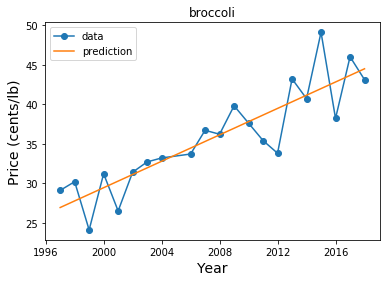

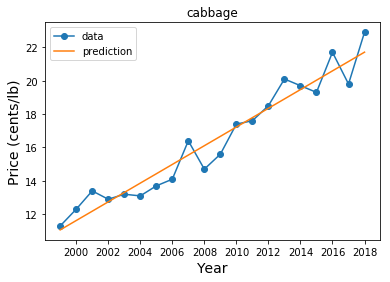

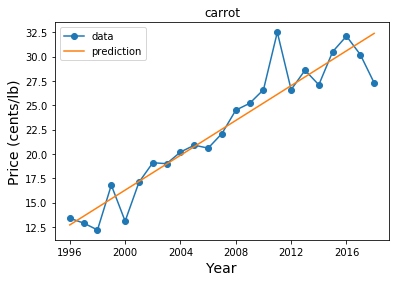

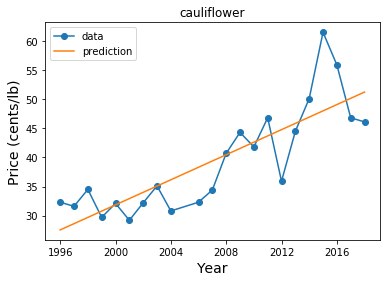

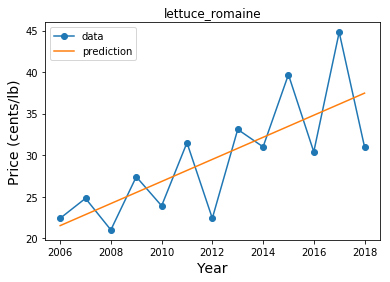

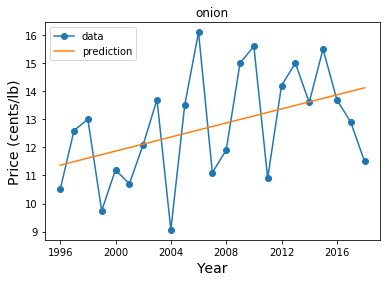

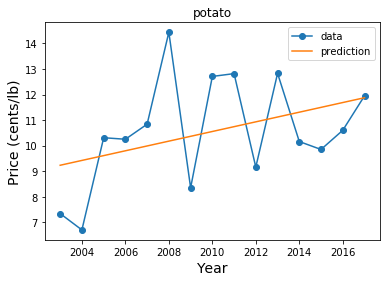

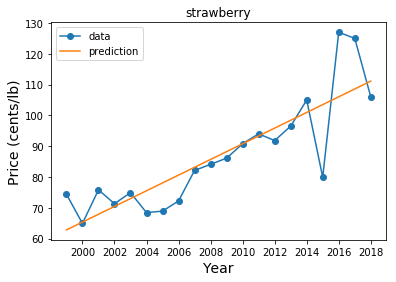

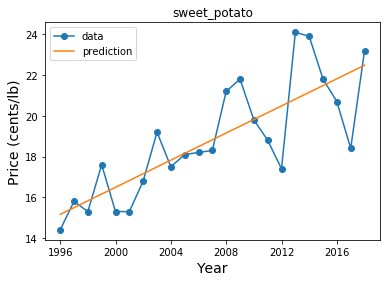

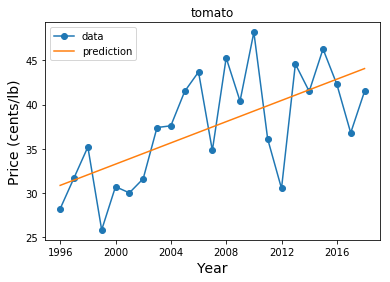

In [6]:
for v in commodities:
    # read in data 
    product_data = read_csv_sort(v)

    # Prepare linear regression
    y = product_data['Value'].values
    X = product_data.index.values
    
    # Reshape your data either X.reshape(-1, 1) if your data has a single feature/column and X.reshape(1, -1) if it contains a single sample.
    X = X.reshape(-1, 1)
    
    # Linear Model
    model = LinearRegression().fit(X, y)
    m = model.coef_[0]
    b = model.intercept_
    # equation of the line
    #print 'y = ', round(m[0],2), 'x + ', round(b[0],2)
    
    # Prediction
    predictions = model.predict(X)
    
    # Plot Data and prediction
    datelist = pd.to_datetime(product_data.index, format='%Y')
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Price (cents/lb)', fontsize=14)
    plt.title(v)
    plt.plot_date(datelist, y, '-o', label='data')
    plt.plot_date(datelist, predictions, '-', label='prediction')
    plt.legend(loc='best')
    plt.show()

    # predict price
    # https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
    pred_X = [[2010],[2011],[2012],[2013],[2014],[2015],[2016],[2017],[2018],[2019],[2020]]
    pred_price = model.predict(pred_X)
    
    test_stats = []
    for i in range(0,11): 
        year = pred_X[i][0]
        current_price = 0
        if product_data.index.contains(year): # Check if this year of index exists in the dataFrame
            current_price = product_data.at[year, 'Value']
        predicted_price = pred_price[i]
 
        test_stats.append([year, current_price ,predicted_price])
    
    df_pred = pd.DataFrame(test_stats, columns=['Year', 'Farm Price', 'Prediction'])
    df_pred.to_csv(save_dir+v+'_farm_price_predictions.csv', index=False)

In [7]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.4165997089863459


In [8]:
df_pred

,Year,Farm Price,Prediction
0,2010,48.2,39.270257
1,2011,36.1,39.871937
2,2012,30.5,40.473617
3,2013,44.6,41.075296
4,2014,41.5,41.676976
5,2015,46.3,42.278656
6,2016,42.3,42.880336
7,2017,36.8,43.482016
8,2018,41.5,44.083696
9,2019,0.0,44.685375
